# Predicting Backorder with a Convolutional Neural Network (CNN)

Here we'll build a CNN on our preprocessed back order predictor data and evaluate how the model performs.

We'll implent the <b/>Keras</b> and <b/> Tensirflow</b> python libraries to accomplish our task.

In [1]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           9041        2419         172         216        6449        6118
Swap:          2047           0        2047


In [2]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [3]:
import tensorflow
print("tensorflow ", tensorflow.__version__)

tensorflow  2.3.0


In [4]:
import theano
print('theano version: ', theano.__version__)

theano version:  1.0.5


In [5]:
import keras
print('keras version: ', keras.__version__)

keras version:  2.4.3


In [6]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from helpers import make_confusion_matrix
import math

In [4]:
import math

# Load Data
Note that to constract an ANN we need to have data as an array

In [9]:
pwd

'/media/sl202194/Seagate Backup Plus Drive/a. Data Science Dream Job/b. Projects/Supply Chain/back_order_predictor_v5'

In [6]:
url = 'derived_data/engineered.csv'

In [10]:
dataset = pd.read_csv(url, header=0)

print(dataset.shape)

(452670, 14)


In [11]:
dataset.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_3_month,perf_6_month_avg,deck_risk_Yes,neg_inv_balance,lead_time_low,national_inv_low,in_transit_low,high_forecast,low_performance,went_on_backorder_Yes
0,13.0,12.0,0.0,0.0,0.0,0.48,1.0,0.0,0,0,1,0,1,0
1,3.0,8.0,0.0,5.0,9.0,0.73,0.0,0.0,0,1,1,0,1,0
2,9.0,9.0,4.0,0.0,0.0,0.85,0.0,0.0,0,0,0,0,0,0
3,213.0,9.0,16.0,0.0,114.0,0.91,0.0,0.0,0,0,0,0,0,0
4,274.0,8.0,0.0,0.0,44.0,0.95,0.0,0.0,0,0,1,0,0,0


In [12]:
#get needed data
columns = ['national_inv','lead_time', 'in_transit_qty', 'forecast_3_month',\
           'neg_inv_balance', 'lead_time_low', 'national_inv_low', 'high_forecast', 'went_on_backorder_Yes']

dataset = dataset[columns]

print(dataset.shape)

(452670, 9)


In [13]:
#Check target unique value count
(unique, counts) = np.unique(dataset['went_on_backorder_Yes'], return_counts=True)
print(unique, counts)

[0 1] [301780 150890]


In [14]:
#convert to numy array
data = dataset.to_numpy()

print(data.shape)

(452670, 9)


In [15]:
data

array([[13.        , 12.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  8.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 9.        ,  9.        ,  4.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.09934682,  2.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.65686763,  8.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 4.        ,  2.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ]])

In [16]:
# split the columns of data into input and output variables.
# split into input (X) and output (y) variables
X = data[:,0:8]
y = data[:,-1]

print(X.shape, y.shape)

(452670, 8) (452670,)


In [17]:
X

array([[13.        , 12.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  8.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 9.        ,  9.        ,  4.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.09934682,  2.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.65686763,  8.        ,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 4.        ,  2.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [18]:
#standardize features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [19]:
scaled_X

array([[-0.40073465,  1.55461231, -0.38074079, ..., -0.70398101,
        -0.98384923, -0.59173766],
       [-0.49940631,  0.35062941, -0.38074079, ..., -0.70398101,
         1.0164159 , -0.59173766],
       [-0.44020331,  0.65162514,  0.48870498, ..., -0.70398101,
        -0.98384923, -0.59173766],
       ...,
       [-0.49842603, -1.45534494, -0.38074079, ...,  1.42049287,
         1.0164159 ,  1.68993807],
       [-0.52252638,  0.35062941, -0.38074079, ..., -0.70398101,
         1.0164159 ,  1.68993807],
       [-0.48953914, -1.45534494, -0.38074079, ...,  1.42049287,
         1.0164159 , -0.59173766]])

In [20]:
scaled_X.shape

(452670, 8)

In [21]:
print(len(scaled_X), len(y))

452670 452670


In [22]:
#check target unique value count
(unique, counts) = np.unique(y, return_counts=True)
print(unique, counts)

[0. 1.] [301780 150890]


In [23]:
np.unique(y)

array([0., 1.])

In [24]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [25]:
frequencies = np.asarray((unique, counts)).T
frequencies

array([[0.0000e+00, 3.0178e+05],
       [1.0000e+00, 1.5089e+05]])

# Train Test Split

In [26]:
#split data
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=0.2, 
                                                    random_state=7, stratify=y)

print(X_train.shape, X_test.shape)

(362136, 8) (90534, 8)


In [27]:
#is traget data balanced?
#Check target unique value count
(unique, counts) = np.unique(y_test, return_counts=True)
print(unique, counts)

[0. 1.] [60356 30178]


In [28]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           9041        2817         122         216        6101        5718
Swap:          2047           0        2047


# Define Model

In [29]:
# define  keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
# compile  keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
36214/36214 [==============================] - 40s 1ms/step - loss: 0.3625 - accuracy: 0.8495
Epoch 2/150
36214/36214 [==============================] - 36s 991us/step - loss: 0.3471 - accuracy: 0.8587
Epoch 3/150
36214/36214 [==============================] - 37s 1ms/step - loss: 0.3436 - accuracy: 0.8605
Epoch 4/150
36214/36214 [==============================] - 38s 1ms/step - loss: 0.3412 - accuracy: 0.8612
Epoch 5/150
36214/36214 [==============================] - 38s 1ms/step - loss: 0.3395 - accuracy: 0.8620
Epoch 6/150
36214/36214 [==============================] - 39s 1ms/step - loss: 0.3381 - accuracy: 0.8621
Epoch 7/150
36214/36214 [==============================] - 42s 1ms/step - loss: 0.3369 - accuracy: 0.8627
Epoch 8/150
36214/36214 [==============================] - 46s 1ms/step - loss: 0.3363 - accuracy: 0.8630
Epoch 9/150
36214/36214 [==============================] - 39s 1ms/step - loss: 0.3352 - accuracy: 0.8635
Epoch 10/150
36214/36214 [==================

In [38]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           9041        2516        2533         176        3991        6049
Swap:          2047           0        2047


In [39]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

11317/11317 [==============================] - 10s 859us/step - loss: 0.3263 - accuracy: 0.8675
Accuracy: 86.75


In [40]:
# make probability predictions with the model
predictions = model.predict(X_test)
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [41]:
rounded[:5]

[0.0, 0.0, 1.0, 0.0, 1.0]

# Get Confusion Matrix

In [42]:
#get the confusion matrix
cf_matrix = confusion_matrix(rounded, y_test)
print(cf_matrix)

[[54755  6378]
 [ 5601 23800]]


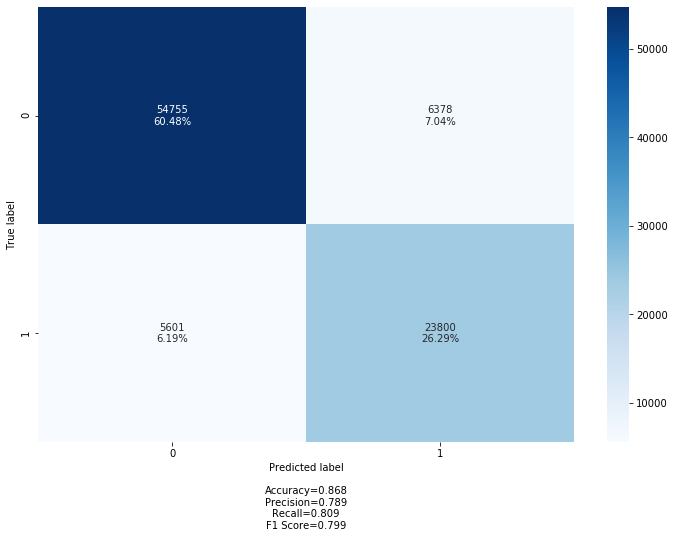

In [43]:
#visualize confusion matrix
make_confusion_matrix.make_confusion_matrix(cf_matrix, figsize=(12,8))

We clearly see a great boost in performance with a CNN.

Accuracy improved from 79.5 to 86.8%, while Recall improved from 75.0% with a logistc regression classifier to 80.9%

However, due to the computational expense and the complexity in translating results from a cnn to business users, a logistic regression classifier seem to be a better option.

# Save Model

In [44]:
# save model and architecture to single file
model.save('cnn_model.h5')

print("Saved model to disk")

Saved model to disk


# Estimating a Stochastic Model's Skill

In [31]:
repeats = range(5)
k = range(1,3)

In [32]:
#define a function to compare values
def compare(a,b):
    return (a > b) - (a < b)

In [33]:
scores = list()
for i in k:
    #train, test = split_old(data, i)
    X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = i/10,
                                  random_state=7, stratify=y)
    
    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
         
    #fit
    model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)
    
    # evaluate the keras model
    _, accuracy = model.evaluate(X_train, y_train)
    
    #get scores
    scores.append(accuracy*100)
    print('Fold ', i,' fitted\n')

12732/12732 [==============================] - 7s 560us/step - loss: 0.0044 - accuracy: 0.9990
Fold  1  fitted

11317/11317 [==============================] - 6s 506us/step - loss: 0.0050 - accuracy: 0.9990
Fold  2  fitted



In [34]:
#get scores
scores

[99.90353584289551, 99.89506602287292]

In [35]:
#get mean skill
mean_skill = sum(scores) / len(scores)
print('Mean accuracy is: ', round(mean_skill, 2))

Mean accuracy is:  99.9


In [38]:
#get standard deviation
b = []
for score in scores:
    #print (score)
    b.append(((score - mean_skill)**2))
    
standard_deviation = math.sqrt(1/len(scores) * sum(b))
print('Standard Deviation is: ', round(standard_deviation,2))

Standard Deviation is:  0.0


In [39]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           9041        2727         269         146        6044        5878
Swap:          2047           0        2047


# Analysis Summary

Our model built with Convolutonal Nueral Networks performed even better.

However, deploying a cnn model for this project might not be an optimal decision in practice due to the difficulty of interprating results to business users.

Therefore, we'll deploy a more simpler logistic regression model instead.